# Fine-grained Clustering of Documents

## Import Dataset

In [91]:
import pandas as pd

df = pd.read_excel('edited_corpus.xlsx')
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,Headline,Num_of_word,Num_unic_tokens,Dict_token_freq
0,0,0,32652,В СГТУ пройдет конференция по современным биои...,86,67,пройти конференция современный биоинженерный т...
1,1,1,32651,Продолжается набор слушателей по программам ДПО,42,34,продолжаться набор слушатель программа дпо сар...
2,2,2,32650,Студент АМФ - серебряный призер Чемпионата Рос...,39,32,студент амф серебряный призёр чемпионат россия...
3,3,3,32643,Сегодня - День Государственного флага РФ,284,175,день государственный флаг ежегодно август росс...
4,4,4,58784,Кафедра рекламы и компьютерного дизайна провод...,28,17,кафедра реклама компьютерный дизайн проводить ...


## Prepare for clustering

In [92]:
data = df['Dict_token_freq'].values.tolist()

In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(max_df=2000, min_df=10)
matrix = vectorizer.fit_transform(data)

vectorizer.get_feature_names()

['абдуллин',
 'абитуриент',
 'август',
 'авиационный',
 'автодорожный',
 'автоматизация',
 'автоматизированный',
 'автоматика',
 'автомеханический',
 'автомобилист',
 'автомобильный',
 'автор',
 'авторизовать',
 'авторский',
 'агентство',
 'аграрный',
 'административный',
 'администрация',
 'адрес',
 'академик',
 'академический',
 'академия',
 'аккредитация',
 'актив',
 'активизация',
 'активно',
 'активность',
 'активный',
 'актовый',
 'актуальный',
 'актёр',
 'акцент',
 'акция',
 'александрович',
 'алтынный',
 'американский',
 'амф',
 'анализ',
 'аналитический',
 'анастасия',
 'анатолий',
 'ангел',
 'английский',
 'андрей',
 'андрейченко',
 'анимация',
 'анкета',
 'анкетирование',
 'ансамбль',
 'антикризисный',
 'антонов',
 'антропология',
 'аппарат',
 'аппаратный',
 'апрель',
 'армения',
 'армия',
 'арт',
 'артист',
 'артём',
 'арх',
 'архитектор',
 'архитектура',
 'архитектурный',
 'аспект',
 'аспирант',
 'аспирантура',
 'ассамблея',
 'ассистент',
 'ассоциация',
 'астраханский',
 '

## Agglomerative Clustering

In [94]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='complete')
preds = model.fit_predict(matrix.toarray())

In [95]:
#print(list(preds))

In [96]:
from sklearn import metrics

data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(AgglomerativeClustering(n_clusters=6))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['Agglomerative'])

results

NameError: name 'datasets' is not defined

## Building a Word Cloud

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='Verdana')

In [32]:
text_raw = " ".join(df['Dict_token_freq'])
wordcloud = WordCloud().generate(text_raw)

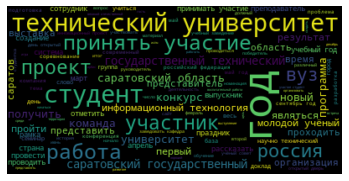

In [33]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Metrics